##### importing required libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### reading the data

In [13]:
walmart = pd.read_csv('e:/DATA SCIENCE/Walmart_Zero_Analyst/Walmart.csv')


#### checking how many rows and cols are there in the data

In [14]:
walmart.shape

(10051, 11)

#### checking how many records are there

In [15]:
walmart.size

110561

#### checking basic information about the data like how many null values are present and what is the data type of the features

In [16]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


#### Basic Descriptive Statistics

In [17]:
walmart.describe().T

,count,mean,std,min,25%,50%,75%,max
invoice_id,10051.0,5025.741220,2901.174372,1.00,2513.50,5026.00,7538.50,10000.00
quantity,10020.0,2.353493,1.602658,1.00,1.00,2.00,3.00,10.00
rating,10051.0,5.825659,1.763991,3.00,4.00,6.00,7.00,10.00
profit_margin,10051.0,0.393791,0.090669,0.18,0.33,0.33,0.48,0.57


#### Basic Descriptive Statistics of object features

In [18]:
walmart.describe(include='object').T

,count,unique,top,freq
Branch,10051,100,WALM058,240
City,10051,98,Weslaco,399
category,10051,6,Fashion accessories,4579
unit_price,10020,1008,$63,159
date,10051,1460,01/12/21,48
time,10051,1001,15:48:00,33
payment_method,10051,3,Credit card,4260


#### checking how many null values are present in each feature

In [19]:
walmart.isna().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

#### showing the null values that are present in the dataset

In [20]:
walmart[walmart['unit_price'].isna()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,09/06/23,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,02/08/22,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,01/08/23,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,21/07/23,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,15/05/22,12:36:00,Ewallet,9.0,0.33
1897,1898,WALM098,Mineral Wells,Fashion accessories,NaN,NaN,01/11/23,10:08:00,Ewallet,4.0,0.18
1898,1899,WALM009,Plano,Home and lifestyle,NaN,NaN,01/10/21,13:05:00,Ewallet,6.0,0.48
1899,1900,WALM071,Lufkin,Fashion accessories,NaN,NaN,19/05/21,8:36:00,Ewallet,7.0,0.33
1900,1901,WALM090,Brownwood,Home and lifestyle,NaN,NaN,13/02/21,14:50:00,Ewallet,8.0,0.33
1901,1902,WALM067,Haltom City,Fashion accessories,NaN,NaN,15/05/22,19:20:00,Ewallet,8.0,0.33


#### showing the null values that are present in the dataset

In [21]:
walmart[walmart['quantity'].isna()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,09/06/23,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,02/08/22,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,01/08/23,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,21/07/23,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,15/05/22,12:36:00,Ewallet,9.0,0.33
1897,1898,WALM098,Mineral Wells,Fashion accessories,NaN,NaN,01/11/23,10:08:00,Ewallet,4.0,0.18
1898,1899,WALM009,Plano,Home and lifestyle,NaN,NaN,01/10/21,13:05:00,Ewallet,6.0,0.48
1899,1900,WALM071,Lufkin,Fashion accessories,NaN,NaN,19/05/21,8:36:00,Ewallet,7.0,0.33
1900,1901,WALM090,Brownwood,Home and lifestyle,NaN,NaN,13/02/21,14:50:00,Ewallet,8.0,0.33
1901,1902,WALM067,Haltom City,Fashion accessories,NaN,NaN,15/05/22,19:20:00,Ewallet,8.0,0.33


#### checking how many duplicate values are there

In [22]:
walmart.duplicated().sum()

np.int64(51)

#### showing the duplicates values

In [23]:
walmart[walmart.duplicated()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10000,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10001,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,08/07/20,12:39:00,Cash,6.0,0.33
10002,9952,WALM035,San Angelo,Fashion accessories,$76,3.0,02/10/21,16:34:00,Cash,6.0,0.48
10003,9953,WALM084,Schertz,Home and lifestyle,$68,3.0,13/06/21,10:52:00,Cash,5.0,0.33
10004,9954,WALM046,Temple,Fashion accessories,$40,1.0,22/08/20,14:38:00,Cash,6.0,0.48
10005,9955,WALM054,Sherman,Home and lifestyle,$61,3.0,05/12/21,7:46:00,Cash,3.0,0.21
10006,9956,WALM003,San Antonio,Fashion accessories,$17,3.0,29/10/20,7:13:00,Cash,4.0,0.48
10007,9957,WALM029,Round Rock,Home and lifestyle,$53,1.0,20/06/23,13:41:00,Cash,4.0,0.48
10008,9958,WALM084,Schertz,Fashion accessories,$35,2.0,10/04/22,14:58:00,Cash,7.0,0.33
10009,9959,WALM065,Texas City,Home and lifestyle,$36,1.0,11/03/22,10:26:00,Cash,4.0,0.33


#### showing how many unique values are there in a feature and what are those unique values

In [24]:
def check_unique_values(dataframe):
    for col in dataframe.columns:
        print(f'Total unique values in {col}: {dataframe[col].nunique()}')
        print()
        print(f'Unique values in {col} : {dataframe[col].unique()}')
        print('-' * 75)
check_unique_values(walmart)

Total unique values in invoice_id: 10000

Unique values in invoice_id : [    1     2     3 ...  9998  9999 10000]
---------------------------------------------------------------------------
Total unique values in Branch: 100

Unique values in Branch : ['WALM003' 'WALM048' 'WALM067' 'WALM064' 'WALM013' 'WALM026' 'WALM088'
 'WALM100' 'WALM066' 'WALM065' 'WALM035' 'WALM027' 'WALM031' 'WALM008'
 'WALM029' 'WALM061' 'WALM053' 'WALM044' 'WALM083' 'WALM023' 'WALM001'
 'WALM072' 'WALM046' 'WALM012' 'WALM075' 'WALM076' 'WALM098' 'WALM021'
 'WALM096' 'WALM022' 'WALM095' 'WALM041' 'WALM070' 'WALM030' 'WALM033'
 'WALM079' 'WALM042' 'WALM036' 'WALM056' 'WALM058' 'WALM015' 'WALM063'
 'WALM089' 'WALM093' 'WALM045' 'WALM005' 'WALM078' 'WALM037' 'WALM069'
 'WALM087' 'WALM020' 'WALM007' 'WALM017' 'WALM094' 'WALM071' 'WALM090'
 'WALM097' 'WALM043' 'WALM011' 'WALM049' 'WALM040' 'WALM034' 'WALM014'
 'WALM004' 'WALM057' 'WALM055' 'WALM038' 'WALM025' 'WALM024' 'WALM085'
 'WALM016' 'WALM018' 'WALM068' 'WALM00

#### copy the original dataframe to df for performing preprocessing

In [25]:
# copy the original dataframe into df
df = walmart.copy()

#### dropping the duplicates

In [26]:
# dropping the duplicates
df.drop_duplicates(keep='first', inplace=True)

#### checking rows and cols after dropping the duplicates

In [27]:
df.shape

(10000, 11)

#### dropping the null values

In [28]:
# handling with null values
df.dropna(inplace=True)

#### checking rows and cols after dropping the duplicates

In [29]:
df.shape

(9969, 11)

#### showing the first 25 records of the data

In [30]:
df.head(25)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
5,6,WALM026,Denton,Electronic accessories,$85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48
6,7,WALM088,Cleburne,Electronic accessories,$68.84,6.0,25/02/19,14:36:00,Ewallet,5.8,0.33
7,8,WALM100,Canyon,Home and lifestyle,$73.56,10.0,24/02/19,11:38:00,Ewallet,8.0,0.18
8,9,WALM066,Grapevine,Health and beauty,$36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33
9,10,WALM065,Texas City,Food and beverages,$54.84,3.0,20/02/19,13:27:00,Credit card,5.9,0.33


#### checking the basic information again after preprocessing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   object 
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 934.6+ KB


#### removing the $ sign from unit price column and then converting it into float

In [32]:
# converting the unit price columns
df['unit_price'] = df['unit_price'].str.replace('$','')
df['unit_price'] = df['unit_price'].astype(float)

#### checking the data types of all the features

In [33]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price        float64
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

#### converting date column into datetime datatype

In [34]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17760\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


#### creating a new column month from date column

In [35]:
df['month'] = df['date'].dt.month

#### checking any 25 rows of the data

In [36]:
df.sample(25)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,month
2486,2487,WALM010,Laredo,Home and lifestyle,65.00,3.0,2023-07-19,20:38:00,Ewallet,5.0,0.48,7
3583,3584,WALM012,Garland,Fashion accessories,60.00,2.0,2021-09-14,16:53:00,Ewallet,4.0,0.48,9
4688,4689,WALM016,Brownsville,Home and lifestyle,31.00,1.0,2021-11-09,17:35:00,Credit card,9.0,0.48,11
951,952,WALM039,Longview,Home and lifestyle,21.90,3.0,2019-09-01,18:43:00,Ewallet,4.7,0.48,9
7149,7150,WALM073,Seguin,Fashion accessories,53.00,2.0,2021-12-22,19:04:00,Credit card,5.0,0.33,12
1147,1148,WALM064,Bedford,Fashion accessories,57.00,3.0,2022-01-18,10:56:00,Ewallet,9.0,0.33,1
9046,9047,WALM082,Weslaco,Home and lifestyle,24.00,2.0,2020-03-26,8:29:00,Cash,5.0,0.33,3
5136,5137,WALM095,Big Spring,Home and lifestyle,22.00,2.0,2021-01-10,20:48:00,Credit card,8.0,0.33,1
5938,5939,WALM025,Waco,Home and lifestyle,56.00,3.0,2020-11-19,19:46:00,Credit card,7.0,0.48,11
8814,8815,WALM029,Round Rock,Home and lifestyle,78.00,1.0,2021-10-11,9:21:00,Cash,5.0,0.48,10


#### data columns

In [37]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'month'],
      dtype='object')

In [38]:
# creating a new feature from the existing features
df['total'] = df['unit_price'] * df['quantity']

In [39]:
df.head(25)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,month,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,5,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,8,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,3,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,1,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,8,604.17
5,6,WALM026,Denton,Electronic accessories,85.39,7.0,2019-03-25,18:30:00,Ewallet,4.1,0.48,3,597.73
6,7,WALM088,Cleburne,Electronic accessories,68.84,6.0,2019-02-25,14:36:00,Ewallet,5.8,0.33,2,413.04
7,8,WALM100,Canyon,Home and lifestyle,73.56,10.0,2019-02-24,11:38:00,Ewallet,8.0,0.18,2,735.60
8,9,WALM066,Grapevine,Health and beauty,36.26,2.0,2019-10-01,17:15:00,Credit card,7.2,0.33,10,72.52
9,10,WALM065,Texas City,Food and beverages,54.84,3.0,2019-02-20,13:27:00,Credit card,5.9,0.33,2,164.52


## Exploratory Data Analysis - EDA

In [40]:
# Basic Descriptive Statistics Summary numerical features
df.describe().T

,count,mean,min,25%,50%,75%,max,std
invoice_id,9969.0,5010.116561,1.0,2524.0,5016.0,7508.0,10000.0,2886.217349
unit_price,9969.0,50.622142,10.08,32.0,51.0,69.0,99.96,21.203766
quantity,9969.0,2.355602,1.0,1.0,2.0,3.0,10.0,1.605455
date,9969,2021-11-04 04:52:04.405657856,2019-01-01 00:00:00,2020-11-16 00:00:00,2021-11-27 00:00:00,2022-12-18 00:00:00,2023-12-31 00:00:00,NaN
rating,9969.0,5.828839,3.0,4.0,6.0,7.0,10.0,1.763723
profit_margin,9969.0,0.393744,0.18,0.33,0.33,0.48,0.57,0.090659
month,9969.0,7.638881,1.0,4.0,9.0,11.0,12.0,3.817043
total,9969.0,121.348819,10.17,54.0,88.0,156.0,993.0,112.67804


In [41]:
# Basic Descriptive Statistics Summary categorical features
df.describe(include='object').T

,count,unique,top,freq
Branch,9969,100,WALM058,239
City,9969,98,Weslaco,396
category,9969,6,Fashion accessories,4538
time,9969,1001,15:48:00,33
payment_method,9969,3,Credit card,4256


In [42]:
numerical_cols =   ['unit_price', 'quantity', 'rating', 'profit_margin', 'month', 'total']
categorical_cols = ['City', 'category', 'payment_method']

#### Univariate Analysis

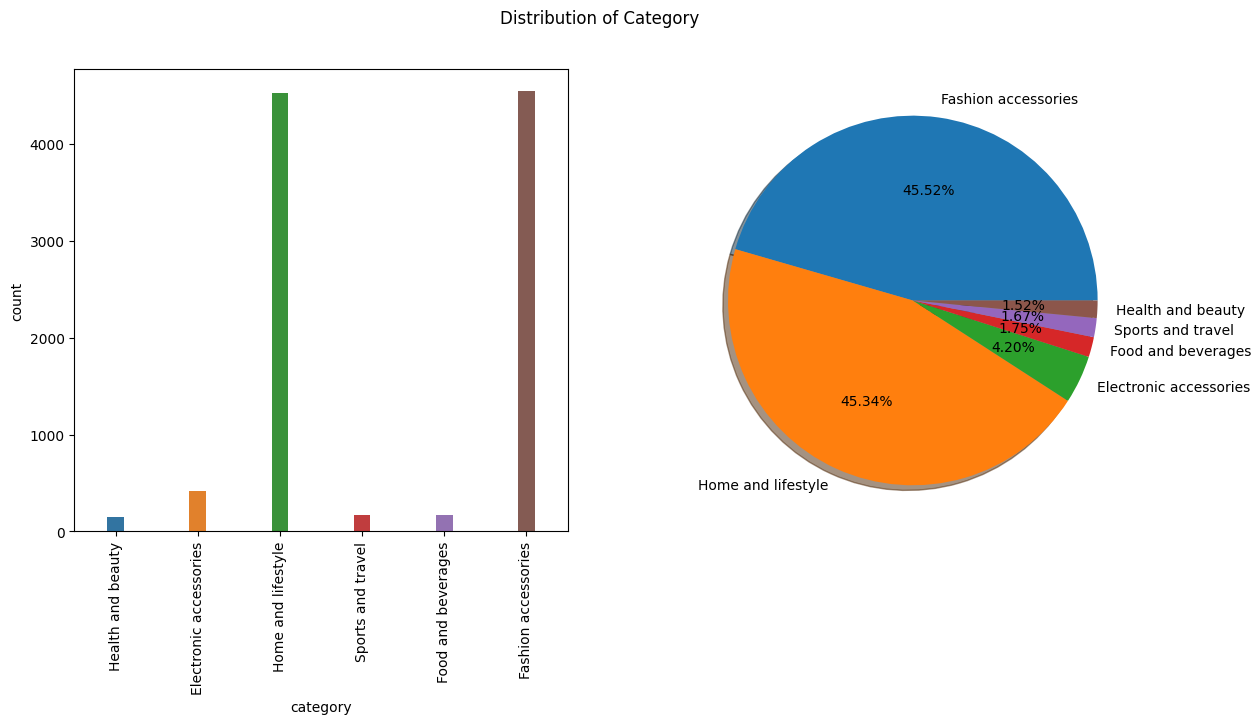

In [43]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Category')

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='category', hue='category', legend=False, width=0.2)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.pie(df['category'].value_counts().values, labels=df['category'].value_counts().index, autopct='%1.2f%%', shadow=True)


plt.show()

#### Home and lifestyle and Fashion accessories category is having most sales

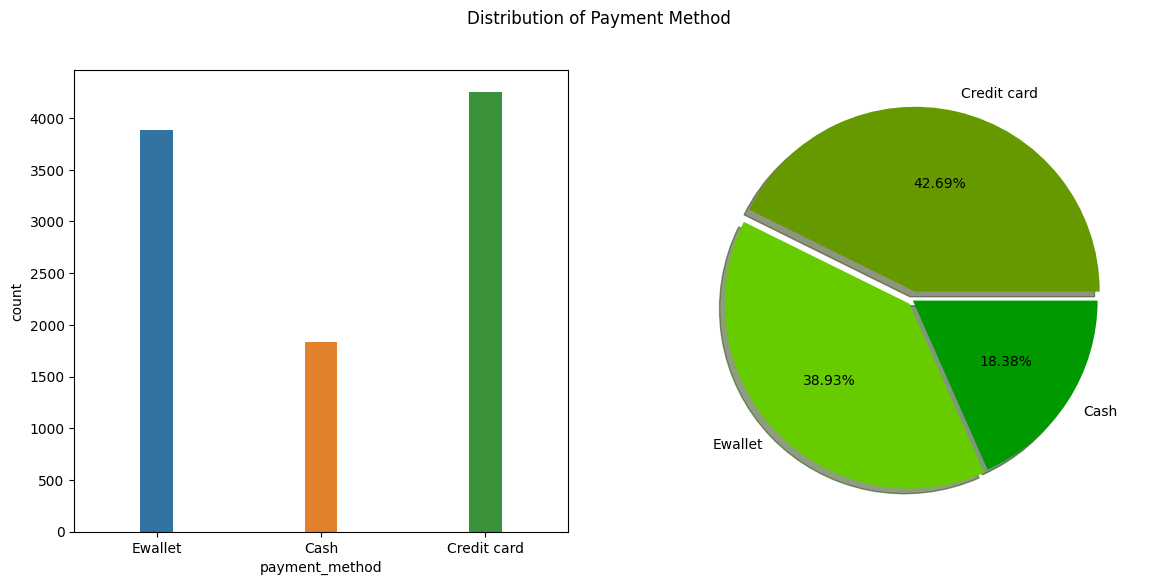

In [44]:
plt.figure(figsize=(14,6))
plt.suptitle('Distribution of Payment Method')

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='payment_method', hue='payment_method', legend=False, width=0.2)

plt.subplot(1, 2, 2)
plt.pie(df['payment_method'].value_counts().values, labels=df['payment_method'].value_counts().index, autopct='%1.2f%%', shadow=True, explode=[0.05, 0.025, 0], colors=['#669900', '#66CC00', '#009900'])


plt.show()

#### Credit Card and Ewallet is more preffered than cash

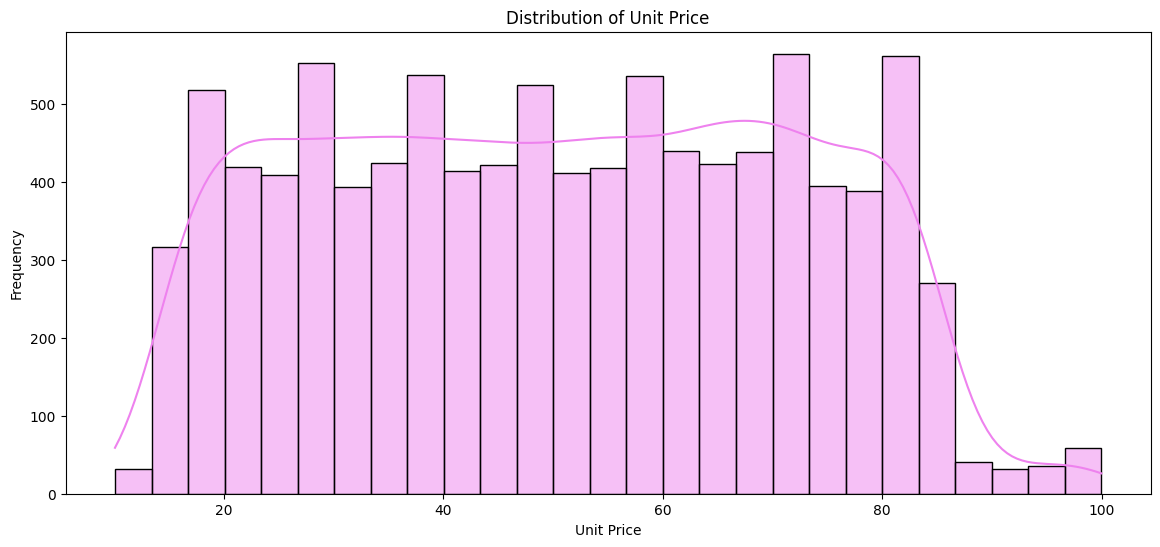

In [45]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='unit_price', kde=True, color='violet')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

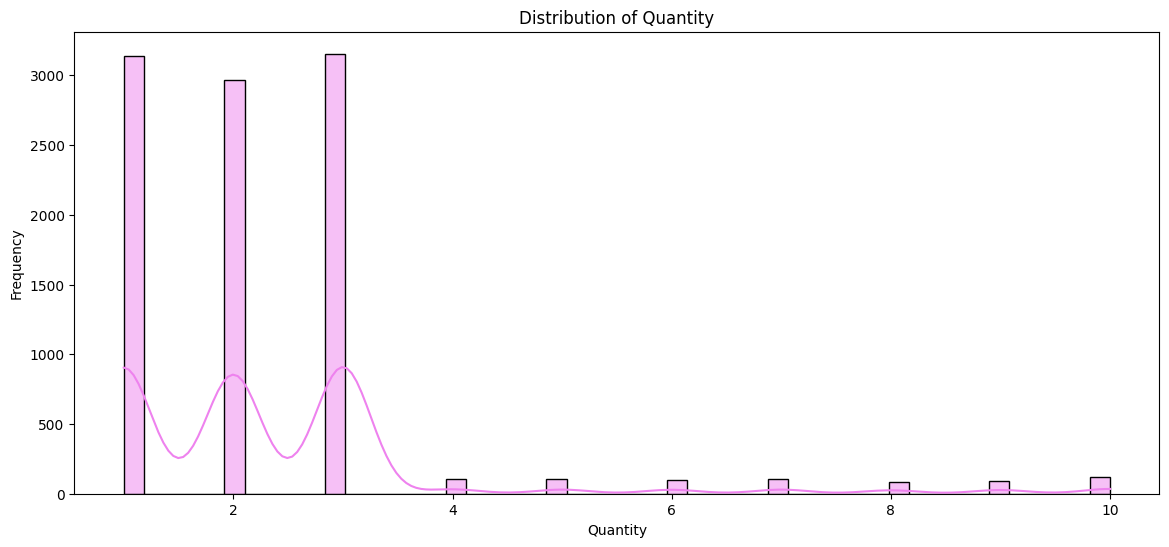

In [46]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='quantity', kde=True, color='violet')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

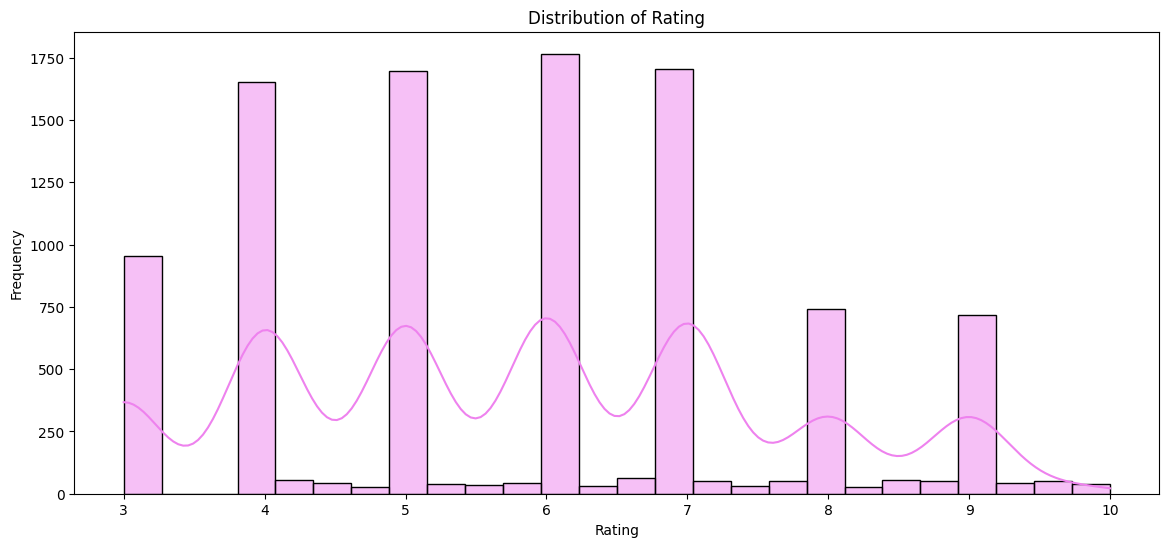

In [47]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='rating', kde=True, color='violet')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

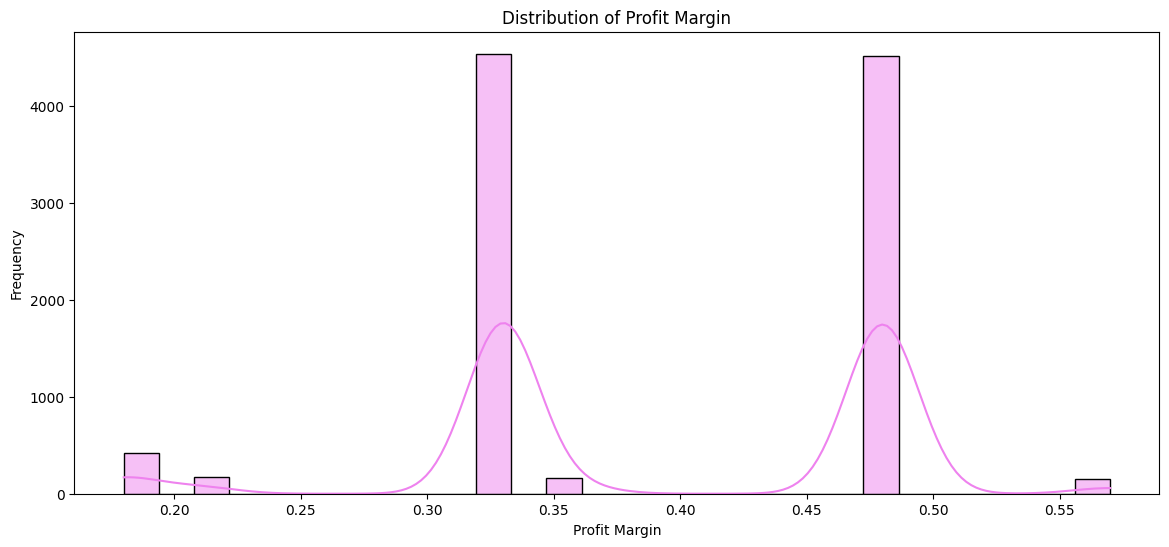

In [48]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='profit_margin', kde=True, color='violet')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

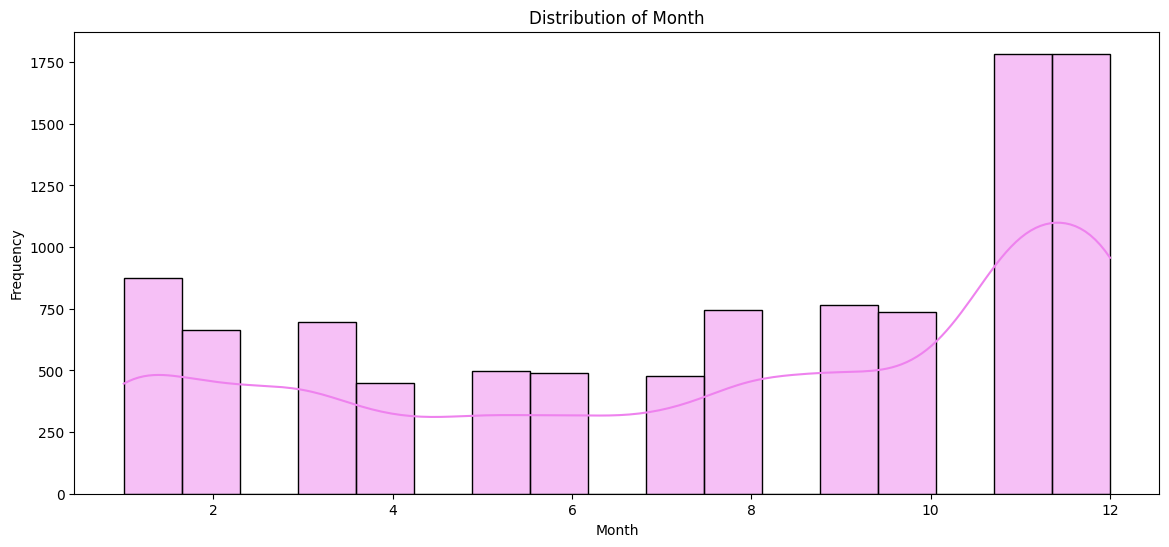

In [49]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='month', kde=True, color='violet')
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

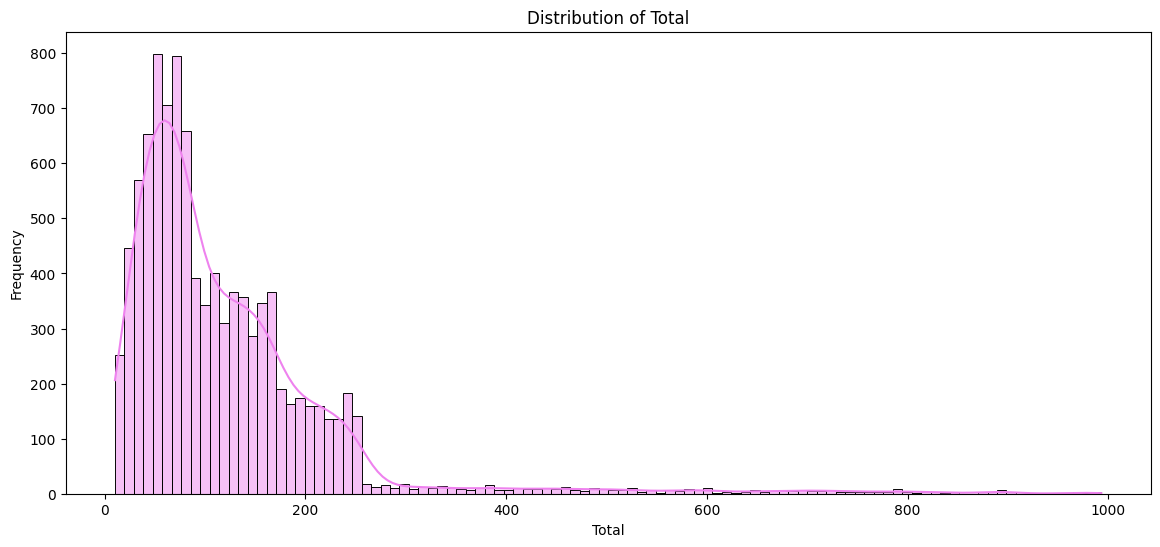

In [50]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='total', kde=True, color='violet')
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

#### left skewed data

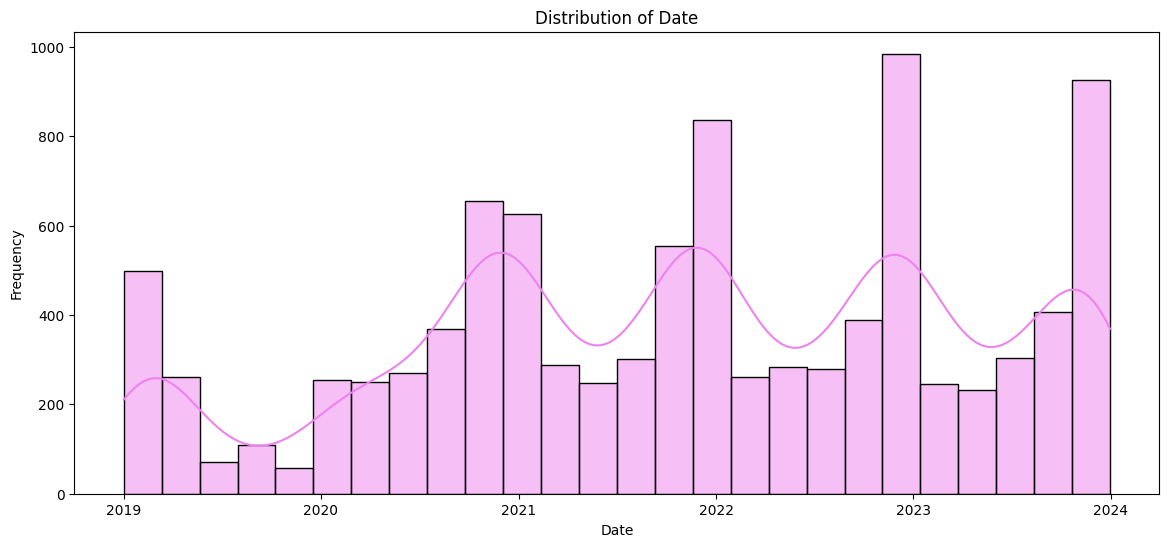

In [51]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='date', kde=True, color='violet')
plt.title('Distribution of Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis

In [52]:
df.to_csv('c:/Users/Administrator/Desktop/Projects/walmart_clean.csv', index=False)

In [53]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'month',
       'total'],
      dtype='object')

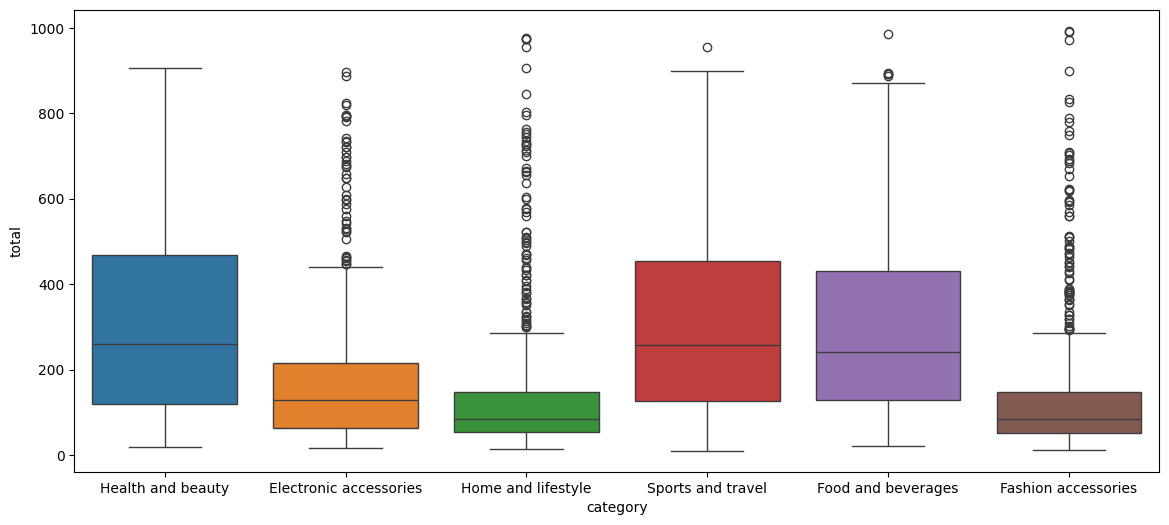

In [54]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='total', hue='category', legend=False)
plt.show()

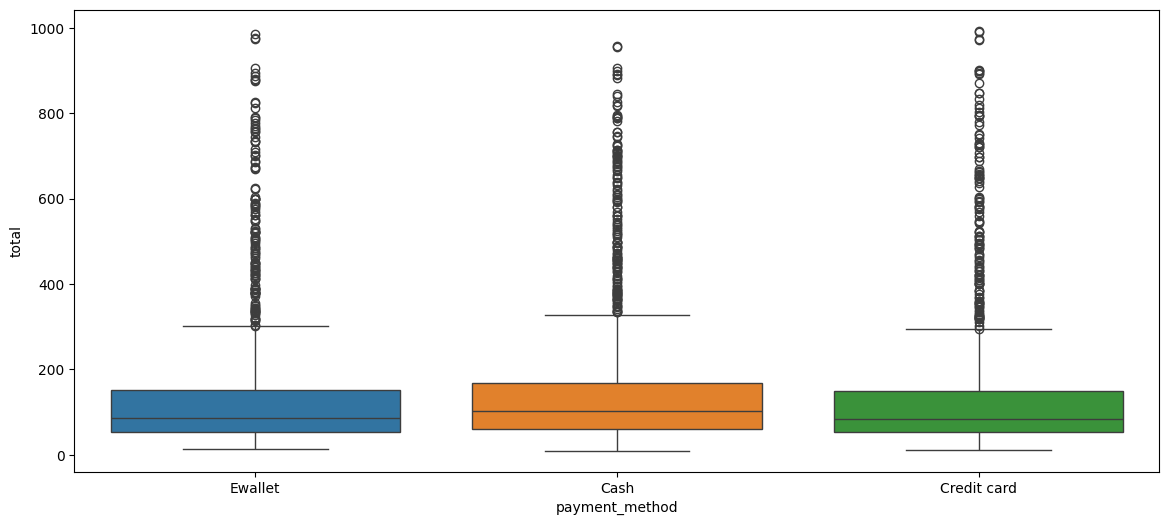

In [55]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='payment_method', y='total', hue='payment_method', legend=False)
plt.show()

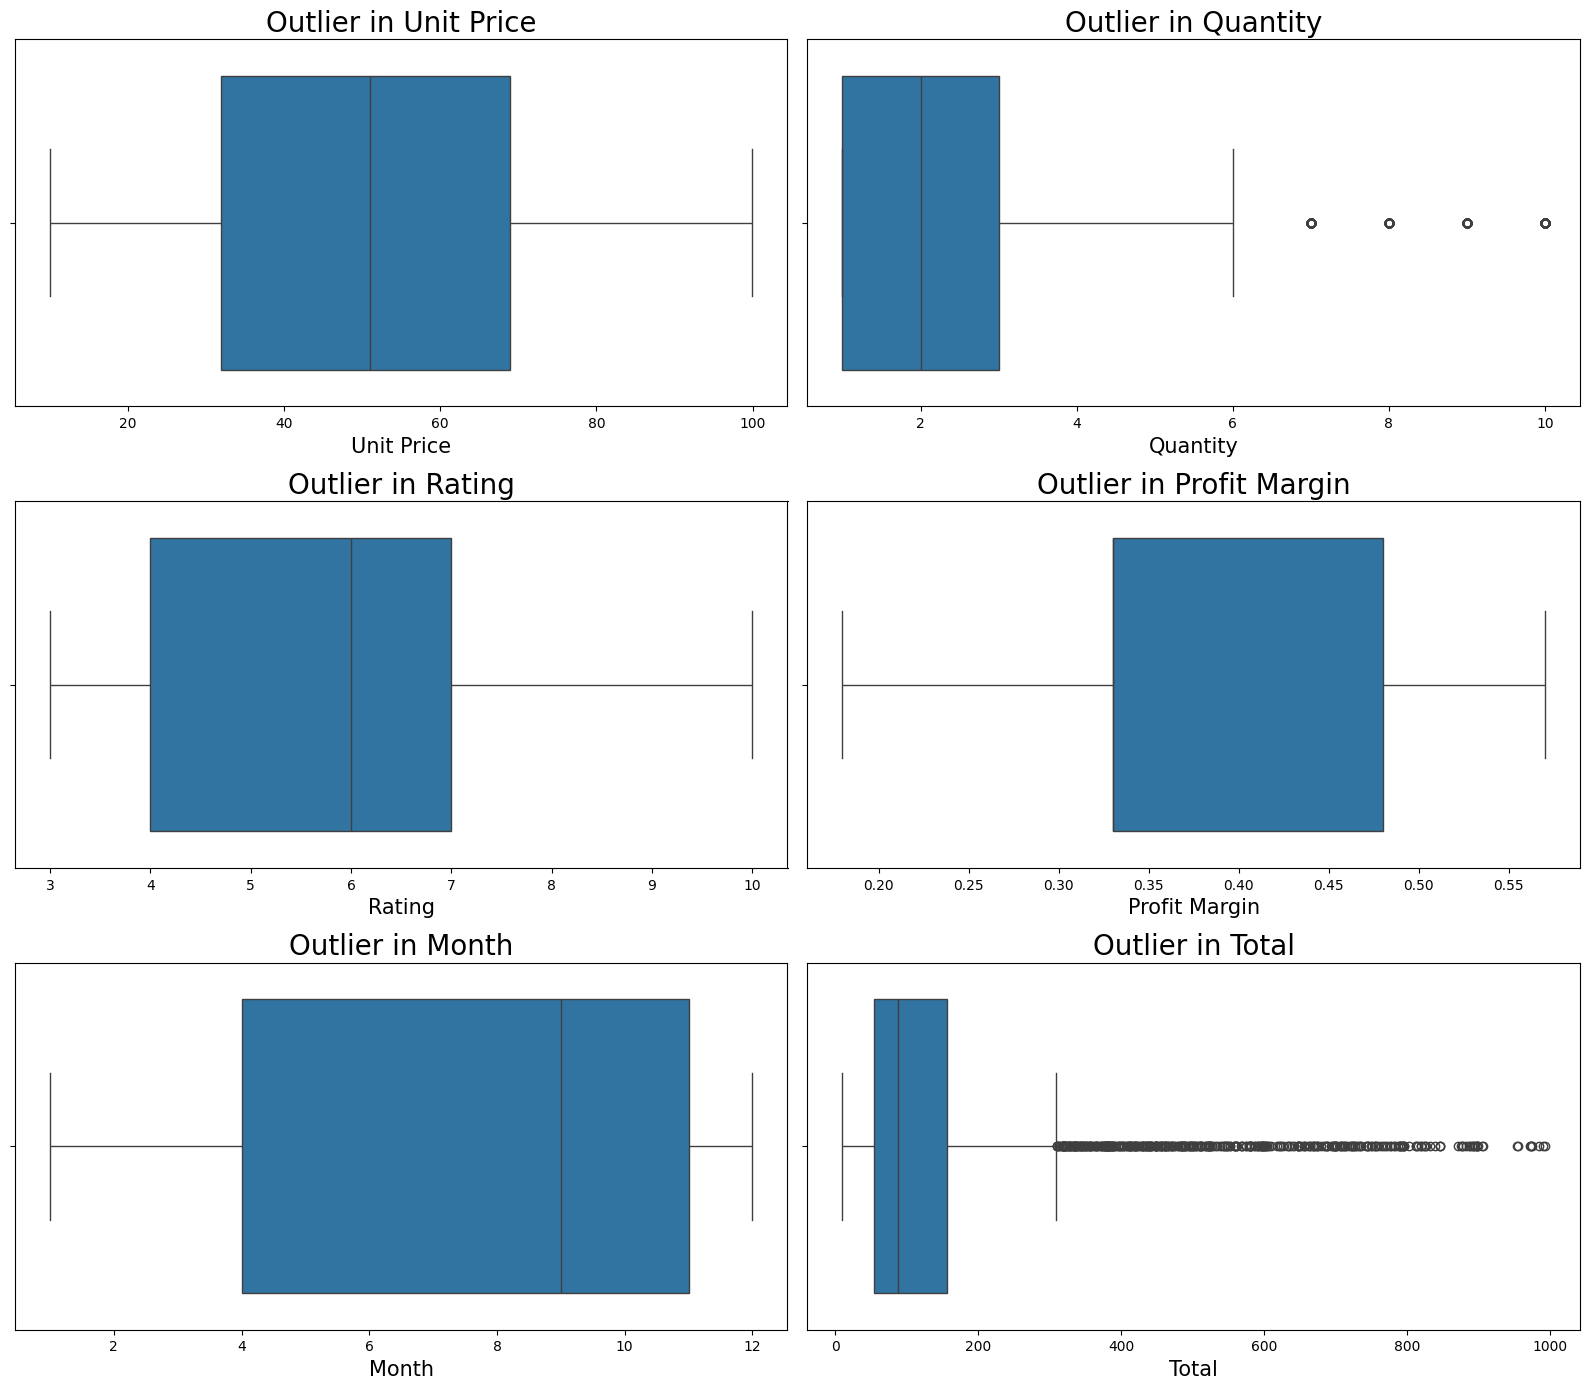

In [56]:
# outlier detection

plt.figure(figsize=(16, 14))

plt.subplot(3, 2, 1)
sns.boxplot(data=df, x='unit_price')
plt.title('Outlier in Unit Price', fontsize = 20)
plt.xlabel('Unit Price', fontsize = 15)

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='quantity')
plt.title('Outlier in Quantity', fontsize = 20)
plt.xlabel('Quantity', fontsize = 15)

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='rating')
plt.title('Outlier in Rating', fontsize = 20)
plt.xlabel('Rating', fontsize = 15)

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='profit_margin')
plt.title('Outlier in Profit Margin', fontsize = 20)
plt.xlabel('Profit Margin', fontsize = 15)

plt.subplot(3, 2, 5)
sns.boxplot(data=df, x='month')
plt.title('Outlier in Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)

plt.subplot(3, 2, 6)
sns.boxplot(data=df, x='total')
plt.title('Outlier in Total', fontsize = 20)
plt.xlabel('Total', fontsize = 15)

plt.tight_layout()
plt.show()

#### most of the outliers present in the total column

In [57]:
df.sample(5)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,month,total
6728,6729,WALM065,Texas City,Home and lifestyle,49.0,1.0,2020-11-16,20:07:00,Credit card,7.0,0.33,11,49.0
9110,9111,WALM050,Victoria,Home and lifestyle,48.0,3.0,2022-09-18,7:26:00,Credit card,4.0,0.48,9,144.0
7397,7398,WALM056,Rowlett,Fashion accessories,19.0,1.0,2023-11-22,19:24:00,Credit card,5.0,0.33,11,19.0
3409,3410,WALM037,League City,Fashion accessories,33.0,3.0,2020-12-09,10:07:00,Ewallet,5.0,0.48,12,99.0
7948,7949,WALM073,Seguin,Home and lifestyle,44.0,3.0,2023-11-11,17:16:00,Credit card,4.0,0.33,11,132.0
